In [1]:
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tools.preprocessing_data import encode_data_to_numeric

from tools.find_optimal_binning import determine_optimal_bins, bin_data_with_optimal_bins

# Function to plot mutual information for a feature
def plot_mutual_information_for_feature_binned(data, feature_name, mi_threshold):
    data = data.apply(lambda x: x.fillna(x.median()), axis=0)

    # Determine optimal bins for each column
    optimal_bins_dict = determine_optimal_bins(data)

    # Apply optimal binning
    binned_data = bin_data_with_optimal_bins(data, optimal_bins_dict)
    
    trust_binned = binned_data[feature_name]
    binned_data = binned_data.drop(columns=[feature_name])

    # Compute Mutual Information between 'trust' and other columns
    mutual_info_results = {}
    for column in binned_data.columns:
        mi_value = mutual_info_regression(binned_data[[column]], trust_binned)
        if mi_value[0] > mi_threshold:
            mutual_info_results[column] = mi_value[0]

    # Create a DataFrame for mutual information values
    mi_df = pd.DataFrame(list(mutual_info_results.items()), columns=['Column', 'Mutual Information'])

    # Print the mutual information DataFrame
    print("Mutual Information Results:")
    print(mi_df)

    # Plot the mutual information values
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Column', y='Mutual Information', data=mi_df)
    plt.title('Mutual Information Between ' + feature_name + ' and Other Columns')
    plt.ylabel('Mutual Information')
    plt.xlabel('Features')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
# Function to plot mutual information for a feature
def plot_mutual_information_for_feature(data, feature_name, mi_threshold):
    code_question_df = pd.read_csv('../Data/SOSEC_Codebook_Germany_2024_May.csv', delimiter=';')
    
    data = data.dropna(subset=[feature_name])
    data = data.dropna(axis=1, how='all')
    data = data.apply(lambda x: x.fillna(x.median()), axis=0)

    trust = data[feature_name]
    rest_data = data.drop(columns=[feature_name])

    # Compute Mutual Information between 'trust' and other columns
    mutual_info_results = {}
    for column in rest_data.columns:
        mi_value = mutual_info_regression(rest_data[[column]], trust)
        if mi_value[0] > mi_threshold:
            mutual_info_results[column] = mi_value[0]

    # Create a DataFrame for mutual information values
    mi_df = pd.DataFrame(list(mutual_info_results.items()), columns=['Column', 'Mutual Information'])

    print(code_question_df)
    
    # Print the mutual information DataFrame
    print("Mutual Information Results:")
    print(mi_df)

    # Plot the mutual information values
    sns.barplot(x='Column', y='Mutual Information', data=mi_df)
    plt.title('Mutual Information Between ' + feature_name + ' and Other Columns')
    plt.ylabel('Mutual Information')
    plt.xlabel('Features')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    plt.show()

/Users/inagege/Documents/00_Uni/SeminarSocialSentimentInTimesOfCrisis/tools/preprocessing_data.py:10: DtypeWarning: Columns (55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,73,74,75,148,161,166) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv("../Data/data_sample_700_SOSEC_dataset_germany.csv")


{0: 'Es wird viel diskutiert, wie es Menschen in der heutigen Zeit geht. Manche sehen vor allem positive Entwicklungen. Andere sind eher pessimistisch. Im Folgenden sehen Sie eine Reihe von Aussagen zu Ihrer ganz persönlichen Lage. Bitte geben Sie zu jeder Aussage an, wie sehr Sie dieser zustimmen oder nicht zustimmen.', 1: 'Gegenwärtig bin ich, alles in allem, zufrieden in meinem Leben.', 2: 'In letzter Zeit hat sich meine Situation deutlich verschlechtert.', 3: 'Ich empfinde so etwas wie Weltuntergangsstimmung.', 4: 'Ich fühle mich nicht in der Lage, Sorgen zu stoppen oder zu kontrollieren.', 5: 'Ich bin in der Lage, über mein Schicksal selbst zu bestimmen.', 6: 'Ich habe das Gefühl, ich kann in unserer Gesellschaft etwas verändern, indem ich mich engagiere.', 7: 'Ich empfinde Nervosität, Ängstlichkeit oder Anspannung.', 8: 'Ich empfinde Niedergeschlagenheit, Schwermut oder Hoffnungslosigkeit.', 9: 'Ich habe wenig Interesse und Freude im Alltag.', 10: 'Ich empfinde große Wut, wenn ic

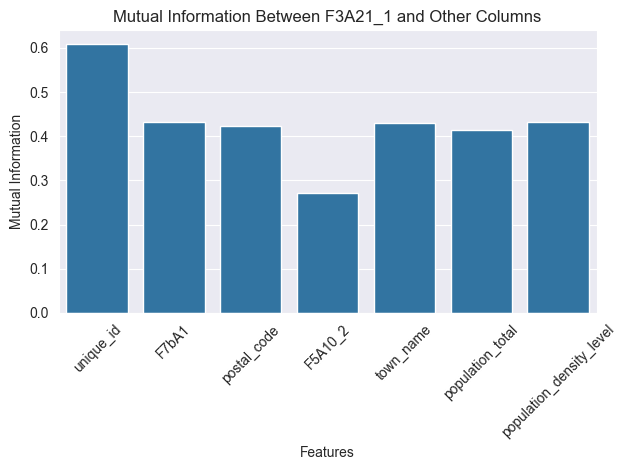

In [2]:
plot_mutual_information_for_feature(encode_data_to_numeric().copy(), 'F3A21_1', 0.2)

/Users/inagege/Documents/00_Uni/SeminarSocialSentimentInTimesOfCrisis/tools/preprocessing_data.py:10: DtypeWarning: Columns (55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,73,74,75,148,161,166) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv("../Data/data_sample_700_SOSEC_dataset_germany.csv")


{0: 'Es wird viel diskutiert, wie es Menschen in der heutigen Zeit geht. Manche sehen vor allem positive Entwicklungen. Andere sind eher pessimistisch. Im Folgenden sehen Sie eine Reihe von Aussagen zu Ihrer ganz persönlichen Lage. Bitte geben Sie zu jeder Aussage an, wie sehr Sie dieser zustimmen oder nicht zustimmen.', 1: 'Gegenwärtig bin ich, alles in allem, zufrieden in meinem Leben.', 2: 'In letzter Zeit hat sich meine Situation deutlich verschlechtert.', 3: 'Ich empfinde so etwas wie Weltuntergangsstimmung.', 4: 'Ich fühle mich nicht in der Lage, Sorgen zu stoppen oder zu kontrollieren.', 5: 'Ich bin in der Lage, über mein Schicksal selbst zu bestimmen.', 6: 'Ich habe das Gefühl, ich kann in unserer Gesellschaft etwas verändern, indem ich mich engagiere.', 7: 'Ich empfinde Nervosität, Ängstlichkeit oder Anspannung.', 8: 'Ich empfinde Niedergeschlagenheit, Schwermut oder Hoffnungslosigkeit.', 9: 'Ich habe wenig Interesse und Freude im Alltag.', 10: 'Ich empfinde große Wut, wenn ic

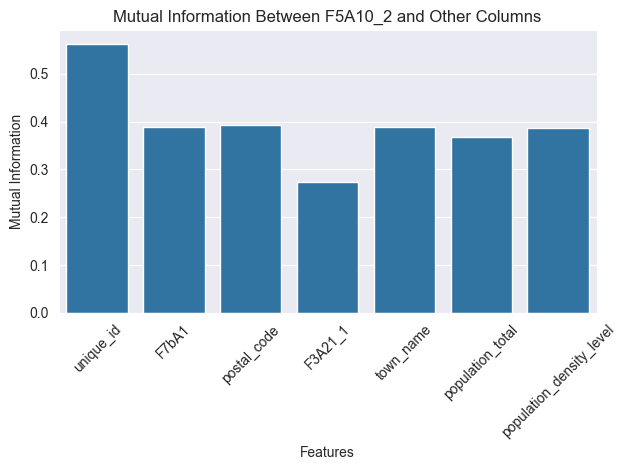

In [3]:
plot_mutual_information_for_feature(encode_data_to_numeric().copy(), 'F5A10_2', 0.2)

/Users/inagege/Documents/00_Uni/SeminarSocialSentimentInTimesOfCrisis/tools/preprocessing_data.py:10: DtypeWarning: Columns (55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,73,74,75,148,161,166) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv("../Data/data_sample_700_SOSEC_dataset_germany.csv")


{0: 'Es wird viel diskutiert, wie es Menschen in der heutigen Zeit geht. Manche sehen vor allem positive Entwicklungen. Andere sind eher pessimistisch. Im Folgenden sehen Sie eine Reihe von Aussagen zu Ihrer ganz persönlichen Lage. Bitte geben Sie zu jeder Aussage an, wie sehr Sie dieser zustimmen oder nicht zustimmen.', 1: 'Gegenwärtig bin ich, alles in allem, zufrieden in meinem Leben.', 2: 'In letzter Zeit hat sich meine Situation deutlich verschlechtert.', 3: 'Ich empfinde so etwas wie Weltuntergangsstimmung.', 4: 'Ich fühle mich nicht in der Lage, Sorgen zu stoppen oder zu kontrollieren.', 5: 'Ich bin in der Lage, über mein Schicksal selbst zu bestimmen.', 6: 'Ich habe das Gefühl, ich kann in unserer Gesellschaft etwas verändern, indem ich mich engagiere.', 7: 'Ich empfinde Nervosität, Ängstlichkeit oder Anspannung.', 8: 'Ich empfinde Niedergeschlagenheit, Schwermut oder Hoffnungslosigkeit.', 9: 'Ich habe wenig Interesse und Freude im Alltag.', 10: 'Ich empfinde große Wut, wenn ic

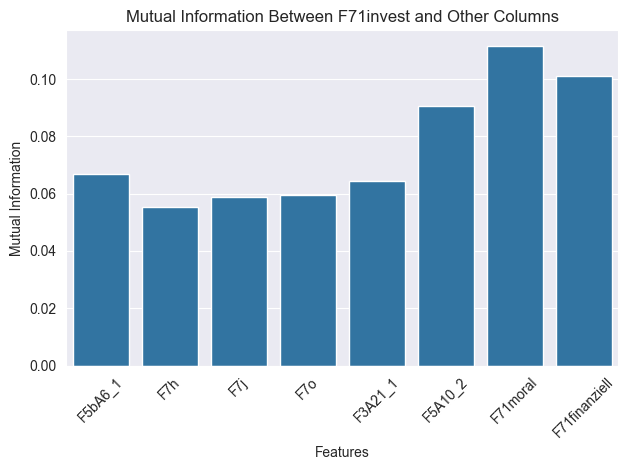

In [4]:
plot_mutual_information_for_feature(encode_data_to_numeric().copy(), 'F71invest', 0.05)